# Notebook 3: Binding-Feature Analysis

Produce the manuscript-ready clustering and distribution visuals from the binding-feature matrix. The notebook performs hierarchical clustering of ligand–receptor pairs, renders a **clustering dendrogram** alongside a **feature–feature correlation heatmap** (**Supplementary Figure 1**), and plots **feature distributions colored by cluster assignments** (**Supplementary Figure 2**).

**Input**

* `./Data/binding_features.csv`

**Outputs**

* `./Figures/binding_features/supplementary_figure_1.*` — dendrogram + correlation heatmap (panel figure)
* `./Figures/binding_features/supplementary_figure_2.*` — distributions colored by clusters


In [ ]:
import pandas as pd
import os
import numpy as np 
import os
import pandas as pd
import ast
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

figures_dir = r"Z:\MorrissyLab Dropbox\Manuscripts_in_progress\XenoSignalDB\RawFigures\fig2"



df = pd.read_csv("cell-cell-data/ipsae_features_all_without_annotation.csv", index_col=0)
df = df[df["Type"]=="max"].fillna(0)
df2 = pd.read_csv("cell-cell-data/xenosignal_db_features_all_v2.csv")
df2 = df2[(df2["len_prot"]==2)].fillna(0)


# Merge the dataframes
merged_df = df.merge(
    df2,
    left_on=['job_name', 'model_id'],
    right_on=['Interaction Name', 'Model Number'],
    how='inner'
)

df_proteins = pd.read_csv("cell-cell-data/cellchat_proteins.csv", index_col=0)

# Step 1: Parse string to list
list_columns = ['ligand_list', 'receptor_list']
for col in list_columns:
    merged_df[col] = merged_df[col].apply(ast.literal_eval)

# Step 2: Create mapping dictionary from df_proteins
protein_to_entrez = dict(zip(df_proteins['Key'], df_proteins['Entrez_protein_id']))

# Step 3: Map proteins to Entrez IDs for each list column
def map_to_entrez(protein_list):
    return [protein_to_entrez.get(p, None) for p in protein_list]

for col in list_columns:
    new_col = col + '_entrez'
    merged_df[new_col] = merged_df[col].apply(map_to_entrez)


# Columns to drop (flattened and duplicates removed)
cols_to_drop = [
    "Chn1", "Chn2", "PAE", "Dist", "Type", "job_name_y", "Model Number", "model_path",
    "File Name", "count_tokens", "len_prot", "n_group", "n_group_name", "Number of Chains",
    "Number of Residues", "group_name", "common_name", "interaction_name_2",
    "InterfaceAAs", "mpnn_interface_residues", "af3_has_clash", "af3_num_recycles",
    "Temperature (°C)", "af3_chain_iptm", "af3_chain_pair_iptm",
    "af3_chain_pair_pae_min", "af3_chain_ptm", "Interaction Name", "af3_ranking_score", "pdockq", "n_if_contacts", "ppv"
]

merged_df.drop(columns=[col for col in cols_to_drop if col in merged_df.columns], inplace=True)

# Desired column order
desired_columns = [
    'job_name_x', 'model_id',
    'pathway_name', 'ligand_type', 'receptor_type', 'ligand_list',
    'receptor_list', 'common_name_ligand', 'common_name_receptor',
    'pair_type', 'ligand_list_entrez', "receptor_list_entrez"
]

# Place desired columns first, keeping remaining columns after
remaining_columns = [col for col in merged_df.columns if col not in desired_columns]
merged_df = merged_df[desired_columns + remaining_columns]
# merged_df = merged_df[merged_df["model_id"]==0]
# Display first few rows


rename_map = {
    'ipSAE': 'ipSAE',
    'ipSAE_d0chn': 'ipSAE_chn',
    'ipSAE_d0dom': 'ipSAE_dom',
    'ipTM_af': 'ipTM_af',
    'ipTM_d0chn': 'ipTM_chn',
    'pDockQ': 'pDockQ',
    'pDockQ2': 'pDockQ2',
    'LIS': 'LIS',
    'n0res': 'n0_res',
    'n0chn': 'n0_chn',
    'n0dom': 'n0_dom',
    'd0res': 'd0_res',
    'd0chn': 'd0_chn',
    'd0dom': 'd0_dom',
    'nres1': 'nres1',
    'nres2': 'nres2',
    'dist1': 'dist1',
    'dist2': 'dist2',
    'Number of Intermolecular Contacts': 'n_contacts',
    'Charged-Charged Contacts': 'cc_contacts',
    'Charged-Polar Contacts': 'cp_contacts',
    'Charged-Apolar Contacts': 'ca_contacts',
    'Polar-Polar Contacts': 'pp_contacts',
    'Apolar-Polar Contacts': 'ap_contacts',
    'Apolar-Apolar Contacts': 'aa_contacts',
    'Percentage of Apolar NIS Residues': 'apolar_NIS_pct',
    'Percentage of Charged NIS Residues': 'charged_NIS_pct',
    'Predicted Binding Affinity (kcal/mol)': 'pred_affinity',
    'Predicted Dissociation Constant (Kd, M)': 'pred_Kd',
    'af3_fraction_disordered': 'frac_disordered',
    'af3_iptm': 'af3_iptm',
    'af3_ptm': 'af3_ptm',
    'i_pLDDT': 'pLDDT_mean',
    'ss_pLDDT': 'pLDDT_ss',
    'Unrelaxed_Clashes': 'unrelaxed_clashes',
    'Binder_Energy_Score': 'binder_energy',
    'Surface_Hydrophobicity': 'surf_hydrophobicity',
    'ShapeComplementarity': 'shape_comp',
    'PackStat': 'packstat',
    'dG': 'dG',
    'dSASA': 'dSASA',
    'dG/dSASA': 'dG_dSASA',
    'Interface_SASA_%': 'intf_SASA_pct',
    'Interface_Hydrophobicity': 'intf_hydrophobicity',
    'n_InterfaceResidues': 'n_intf_res',
    'n_InterfaceHbonds': 'n_intf_Hbonds',
    'InterfaceHbondsPercentage': 'intf_Hbonds_pct',
    'n_InterfaceUnsatHbonds': 'n_unsat_Hbonds',
    'InterfaceUnsatHbondsPercentage': 'unsat_Hbonds_pct',
    'Interface_Helix%': 'intf_helix_pct',
    'Interface_BetaSheet%': 'intf_beta_pct',
    'Interface_Loop%': 'intf_loop_pct',
    'Binder_Helix%': 'binder_helix_pct',
    'Binder_BetaSheet%': 'binder_beta_pct',
    'Binder_Loop%': 'binder_loop_pct',
}

# Apply renaming
merged_df.rename(columns=rename_map, inplace=True)


merged_df.to_csv("cell-cell-data/xenosignal_db_ipsae_features_pairs_v2.csv")
merged_df.head()


In [20]:
selected_features = merged_df.columns[12:]
print(selected_features)
print(len(selected_features))

Index(['ipSAE', 'ipSAE_chn', 'ipSAE_dom', 'ipTM_af', 'ipTM_chn', 'pDockQ',
       'pDockQ2', 'LIS', 'n0_res', 'n0_chn', 'n0_dom', 'd0_res', 'd0_chn',
       'd0_dom', 'nres1', 'nres2', 'dist1', 'dist2', 'n_contacts',
       'cc_contacts', 'cp_contacts', 'ca_contacts', 'pp_contacts',
       'ap_contacts', 'aa_contacts', 'apolar_NIS_pct', 'charged_NIS_pct',
       'pred_affinity', 'pred_Kd', 'frac_disordered', 'af3_iptm', 'af3_ptm',
       'pLDDT_mean', 'pLDDT_ss', 'unrelaxed_clashes', 'binder_energy',
       'surf_hydrophobicity', 'shape_comp', 'packstat', 'dG', 'dSASA',
       'dG_dSASA', 'intf_SASA_pct', 'intf_hydrophobicity', 'n_intf_res',
       'n_intf_Hbonds', 'intf_Hbonds_pct', 'n_unsat_Hbonds',
       'unsat_Hbonds_pct', 'intf_helix_pct', 'intf_beta_pct', 'intf_loop_pct',
       'binder_helix_pct', 'binder_beta_pct', 'binder_loop_pct'],
      dtype='object')
55


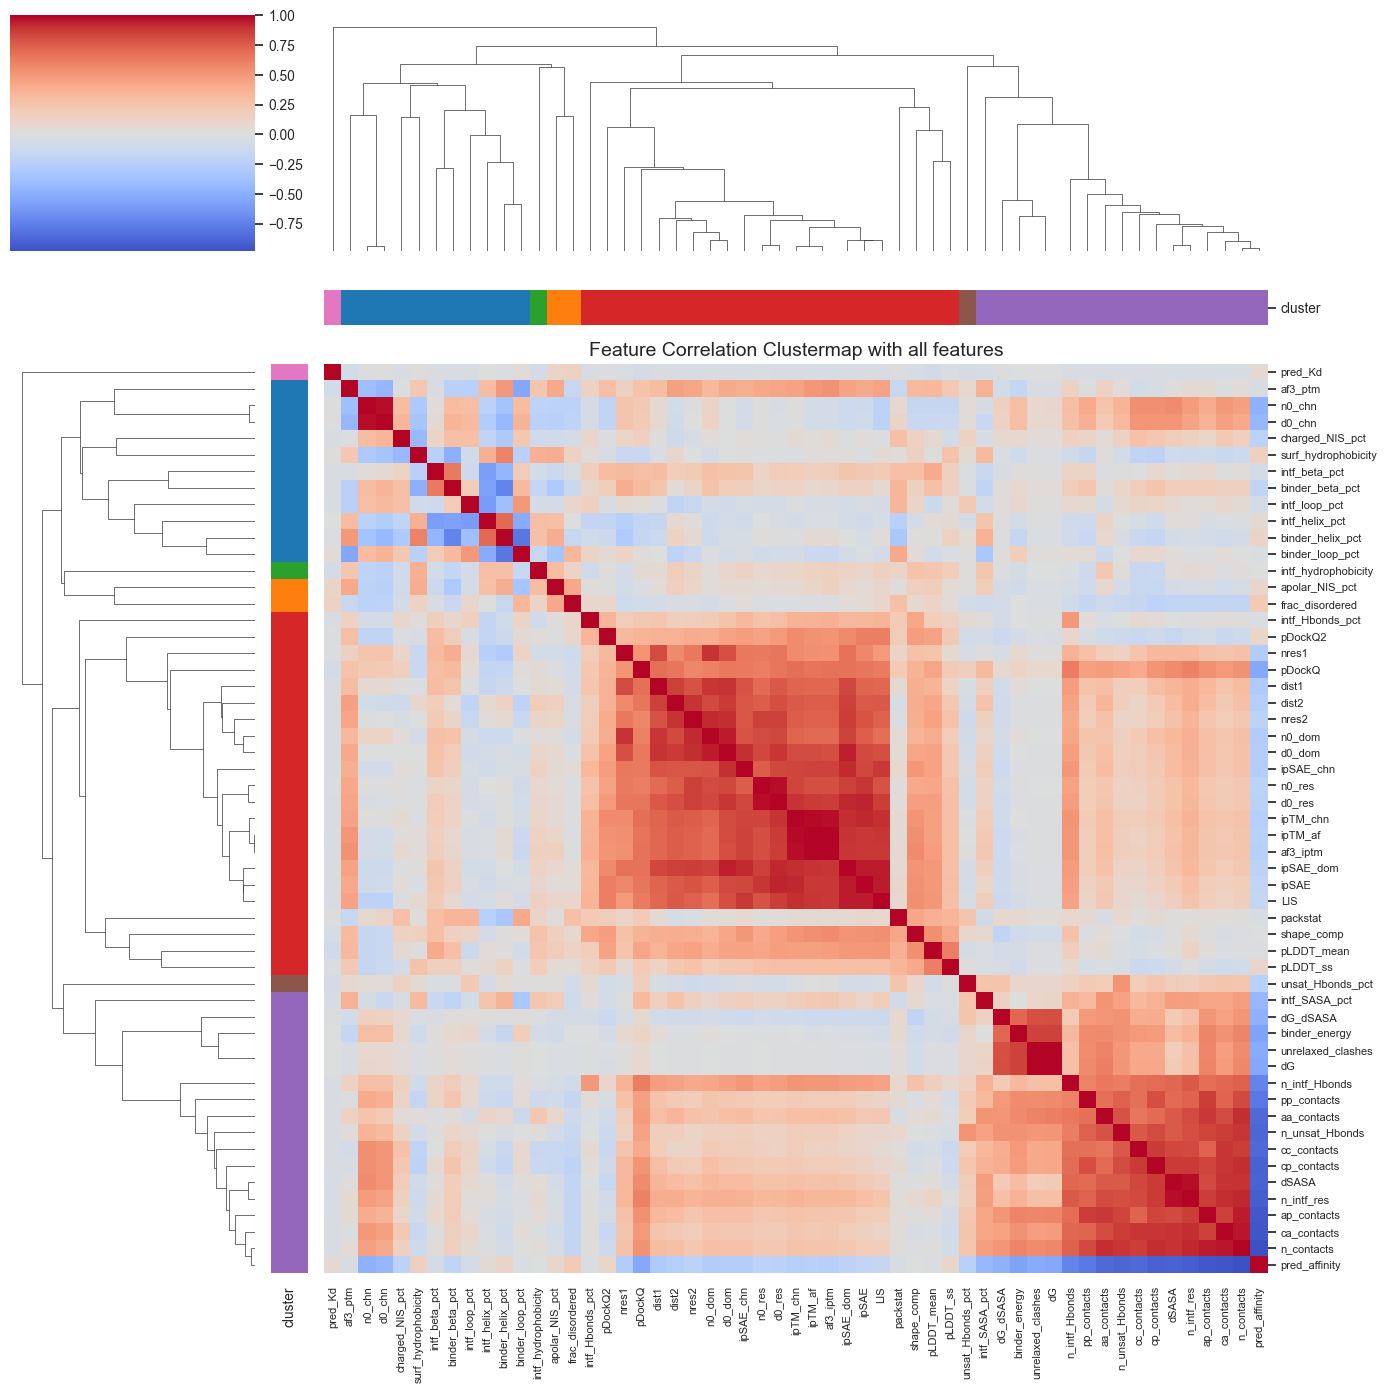

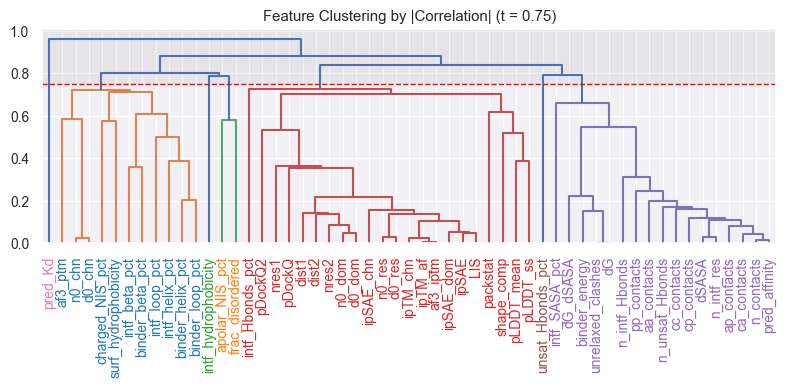

In [30]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def get_link_color_func(linkage, clusters, lut):
    """
    Generate a link color function for dendrograms where each internal node
    is colored by the majority cluster of its children (if consistent).
    """
    from collections import Counter

    n = len(clusters)
    node_to_members = {i: [i] for i in range(n)}  # node index to list of leaves

    # Build a mapping of each internal node to its leaf members
    for node_id, (left, right, _, _) in enumerate(linkage, start=n):
        left = int(left)
        right = int(right)
        node_to_members[node_id] = node_to_members[left] + node_to_members[right]

    # Assign a cluster to each node based on majority vote
    node_to_cluster = {}
    for node_id, members in node_to_members.items():
        member_clusters = [clusters[i] for i in members]
        most_common, count = Counter(member_clusters).most_common(1)[0]
        node_to_cluster[node_id] = most_common

    # Now define the color function using the assigned cluster
    def color_func(node_id):
        cluster = node_to_cluster.get(node_id, None)
        if cluster in lut:
            return matplotlib.colors.to_hex(lut[cluster])
        return 'black'  # fallback

    return color_func


# Use the color function

# Compute correlation and distance matrix
df_corr = merged_df[selected_features].copy()
corr = df_corr.corr()
dist = 1 - corr.abs()
condensed = sch.distance.squareform(dist.values, checks=False)

# Hierarchical clustering
linkage = sch.linkage(condensed, method='average')
t = 0.75
clusters = sch.fcluster(linkage, t=t, criterion='distance')

# Create DataFrame for cluster labels
cluster_df = pd.DataFrame({'cluster': clusters}, index=corr.columns)
unique_clusters = np.unique(clusters)

# Use tab10 palette for clusters (max 10 clusters)
palette = sns.color_palette("tab10", n_colors=len(unique_clusters))
lut = dict(zip(unique_clusters, palette))
row_colors = cluster_df['cluster'].map(lut)

# Clustermap with tab10 colors
sns.set(font_scale=0.9)
g = sns.clustermap(
    corr,
    row_linkage=linkage,
    col_linkage=linkage,
    row_colors=row_colors,
    col_colors=row_colors,
    cmap='coolwarm',
    center=0,
    figsize=(14, 14),
    cbar_kws={"shrink": 0.8},
    xticklabels=True,
    yticklabels=True
)

# Set xticklabels and yticklabels font size and rotation
g.ax_heatmap.set_xticklabels(
    g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=8
)
g.ax_heatmap.set_yticklabels(
    g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=8
)

# Title
g.ax_heatmap.set_title('Feature Correlation Clustermap with all features', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "features_correlations_clustermap_supplementry.pdf"))
plt.show()


plt.figure(figsize=(8, 4))

# Draw dendrogram without leaf_color_func
link_color_func = get_link_color_func(linkage, clusters, lut)

dn = sch.dendrogram(
    linkage,
    labels=corr.columns.tolist(),
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=t,
)

# Map labels to cluster colors
label_colors = {label: matplotlib.colors.to_hex(lut[cluster_df.loc[label, 'cluster']]) for label in dn['ivl']}

ax = plt.gca()

# Color the x-axis tick labels by cluster color
xticks = ax.get_xticklabels()
for tick in xticks:
    label = tick.get_text()
    if label in label_colors:
        tick.set_color(label_colors[label])

# Background shading
plt.axhspan(t, plt.ylim()[1], facecolor='lightgray', alpha=0.3)  # Above threshold
plt.axhspan(plt.ylim()[0], t, facecolor='white', alpha=0.3)      # Below threshold (optional)

# Threshold line
plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

plt.title(f'Feature Clustering by |Correlation| (t = {t})')
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "features_clustering_dendogram.pdf"))
plt.show()


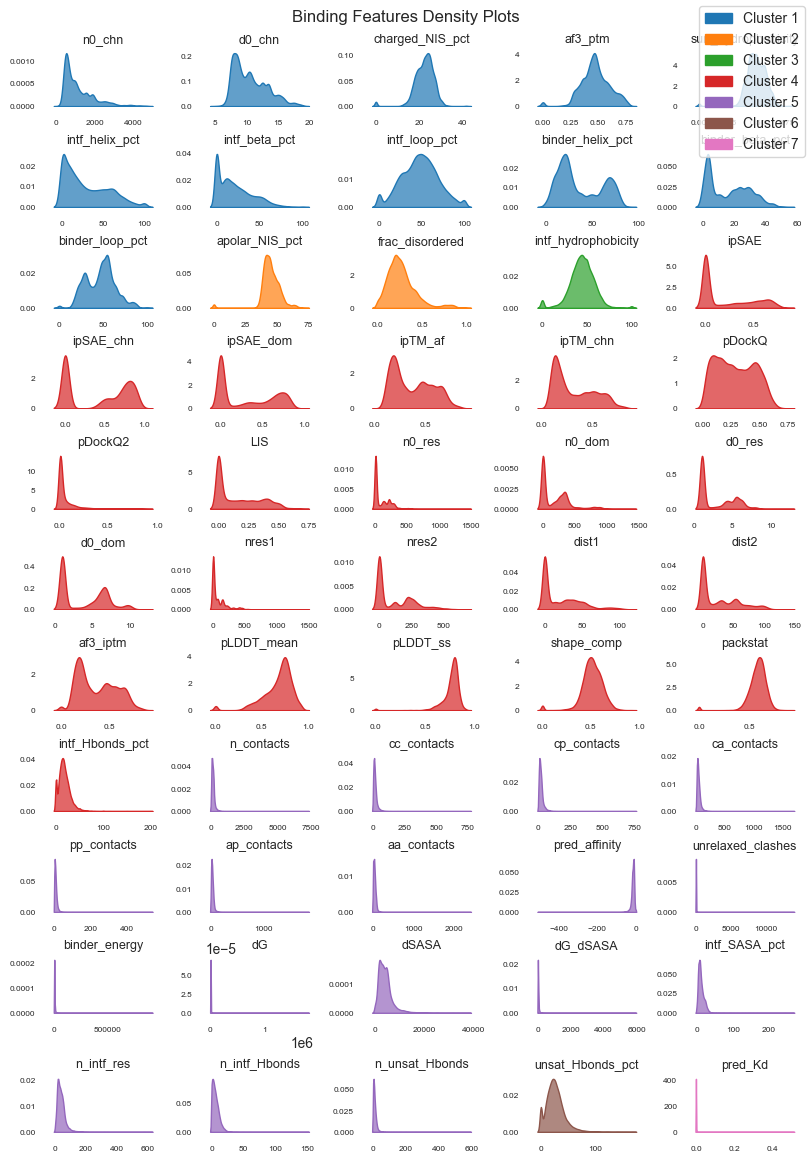

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

sns.set_style("white")

# Define a color palette for clusters
palette = sns.color_palette("tab10", n_colors=len(unique_clusters))
cluster_color_map = {cluster: palette[i] for i, cluster in enumerate(unique_clusters)}

# Group features by cluster
cluster_df = pd.DataFrame({
    'feature': df_corr.columns,
    'cluster': clusters
})
clustered_features = cluster_df.groupby('cluster')['feature'].apply(list)

# Flatten features and retain their cluster
all_features = []
cluster_labels = []
for cluster_id, features in clustered_features.items():
    all_features.extend(features)
    cluster_labels.extend([cluster_id] * len(features))

n_features = len(all_features)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 11.5), constrained_layout=True)
axes = axes.flatten()

for i, (feature, cluster_id) in enumerate(zip(all_features, cluster_labels)):
    ax = axes[i]
    sns.kdeplot(
        data=merged_df,
        x=feature,
        fill=True,
        ax=ax,
        color=cluster_color_map[cluster_id],
        alpha=0.7
    )
    ax.set_title(feature, fontsize=9)  # Remove (cX) cluster label from title
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=6)
    ax.tick_params(axis='x', labelsize=6)
    sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
    ax.grid(False)
    ax.set_facecolor('white')

# Turn off any remaining empty subplots
for j in range(len(all_features), len(axes)):
    axes[j].axis('off')

# Create a single legend with cluster colors
from matplotlib.patches import Patch
legend_handles = [Patch(color=cluster_color_map[c], label=f"Cluster {c}") for c in unique_clusters]
fig.legend(handles=legend_handles, loc='upper right', fontsize=10)

plt.suptitle("Binding Features Density Plots", fontsize=12)
plt.savefig(os.path.join(figures_dir, "features_density_plots_supplementry.pdf"))
plt.show()


In [73]:
import pandas as pd

# Define feature info: feature_name: (agg_func, threshold, comparator)
# agg_func: 'min' or 'max' to get idxmin or idxmax per group
# comparator: '>' or '<' for filtering the threshold
feature_criteria = {
    "intf_beta_pct":     ("min", 75, ">"),
    "frac_disordered":   ("min", 0.90, ">"),
    "intf_hydrophobicity": ("min", 75, ">"),
    "pred_affinity":     ("max", -50, "<"),
    "unsat_Hbonds_pct":  ("min", 60, ">"),
    "pred_Kd":           ("min", 0.005, ">"),
}

outlier_dfs = []

for feature, (agg_func, threshold, comp) in feature_criteria.items():
    if agg_func == "min":
        idx = merged_df.groupby("job_name_x")[feature].idxmin()
    else:
        idx = merged_df.groupby("job_name_x")[feature].idxmax()
    grouped_minmax_df = merged_df.loc[idx]

    # Filtering according to threshold and comparator
    if comp == ">":
        filtered = grouped_minmax_df[grouped_minmax_df[feature] > threshold].copy()
    else:
        filtered = grouped_minmax_df[grouped_minmax_df[feature] < threshold].copy()
    
    # Annotate the outlier type (feature name)
    filtered["outlier_feature"] = feature
    outlier_dfs.append(filtered)

# Concatenate all outlier dataframes
all_outliers = pd.concat(outlier_dfs)

# There might be duplicates if the same row is an outlier on multiple features
# Group by index and aggregate
def agg_outlier_features(series):
    return list(series)

outlier_summary = (
    all_outliers[["outlier_feature"]]
    .groupby(all_outliers.index)
    .agg(agg_outlier_features)
)

# Create columns for number of outliers and joined feature names
outlier_summary["num_outliers"] = outlier_summary["outlier_feature"].apply(len)
outlier_summary["outlier_features_list"] = outlier_summary["outlier_feature"].apply(lambda x: ", ".join(x))

# Join back the original rows with outlier summary info
result_df = merged_df.loc[outlier_summary.index].copy()
result_df = result_df.join(outlier_summary[["num_outliers", "outlier_features_list"]])

# Reorder columns: put outlier annotations at positions 3 and 4
cols = list(result_df.columns)
for col in ["num_outliers", "outlier_features_list"]:
    cols.remove(col)
cols.insert(2, "num_outliers")
cols.insert(3, "outlier_features_list")
result_df = result_df[cols].sort_values("num_outliers", ascending=False).reset_index(drop=True)
# Merge rows that have the same job_name_x
def merge_outliers(df):
    # Group by job_name_x and aggregate
    merged = df.groupby("job_name_x").agg({
        "num_outliers": "sum",
        "outlier_features_list": lambda x: ", ".join(set(", ".join(x).split(", "))),
    }).reset_index()

    # Get the first row for each job_name_x from original result_df for the rest of the data
    other_cols = df.drop(columns=["num_outliers", "outlier_features_list"]).drop_duplicates(subset=["job_name_x"])
    
    # Merge back the aggregated data
    final = pd.merge(other_cols, merged, on="job_name_x")

    # Reorder columns again
    cols = list(final.columns)
    cols.remove("num_outliers")
    cols.remove("outlier_features_list")
    cols.insert(2, "num_outliers")
    cols.insert(3, "outlier_features_list")
    return final[cols].sort_values("num_outliers", ascending=False).reset_index(drop=True)

# Apply the merging
result_df = merge_outliers(result_df)
result_df.to_csv("cell-cell-data/feature_selection_outliers.csv")


In [76]:
result_df

,job_name_x,model_id,num_outliers,outlier_features_list,pathway_name,ligand_type,receptor_type,ligand_list,receptor_list,common_name_ligand,...,n_intf_Hbonds,intf_Hbonds_pct,n_unsat_Hbonds,unsat_Hbonds_pct,intf_helix_pct,intf_beta_pct,intf_loop_pct,binder_helix_pct,binder_beta_pct,binder_loop_pct
0,job10706_col9a2_sdc1_grch38_grch38,4,2,"pred_Kd, frac_disordered",COLLAGEN,GRCh38,GRCh38,[COL9A2],[SDC1],COL9A2_SDC1_GRCh38,...,0.0,0.00,0.0,0.00,100.00,0.00,0.00,14.38,0.00,85.62
1,job11004_col4a6_sdc4_grch38_mm10,4,2,"pred_Kd, frac_disordered",COLLAGEN,GRCh38,mm10,[COL4A6],[Sdc4],COL4A6_SDC4_GRCh38,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,26.26,0.00,73.74
2,job11391_pilr_1_cd99_mm10_grch38,0,2,"pred_Kd, frac_disordered",CD99,mm10,GRCh38,[pilr-1],[CD99],PILR-1_CD99_mm10,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,job11382_cd99_cd99_mm10_grch38,1,2,"pred_Kd, frac_disordered",CD99,mm10,GRCh38,[Cd99],[CD99],CD99_CD99_mm10,...,0.0,0.00,0.0,0.00,100.00,0.00,0.00,54.76,0.00,45.24
4,job11393_cd99_pilr_1_grch38_mm10,2,2,"pred_Kd, frac_disordered",CD99,GRCh38,mm10,[CD99],[pilr-1],CD99_PILR-1_GRCh38,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,job5937_il4_il4ra_grch38_mm10,0,2,"intf_hydrophobicity, frac_disordered",IL4,GRCh38,mm10,[IL4],[Il4ra],IL4_IL4R_GRCh38,...,0.0,0.00,0.0,0.00,100.00,0.00,0.00,20.44,0.68,78.88
6,job10023_dsc2_dsg1_mm10_grch38,0,1,pred_affinity,DESMOSOME,mm10,GRCh38,[Dsc2],[DSG1],DSC2_DSG1C_mm10,...,32.0,23.02,62.0,44.60,23.02,35.25,41.73,12.39,32.22,55.39
7,job10042_dsc1_dsg4_mm10_grch38,0,1,pred_affinity,DESMOSOME,mm10,GRCh38,[Dsc1],[DSG4],DSC1_DSG4_mm10,...,18.0,14.29,46.0,36.51,11.90,25.40,62.70,10.38,33.27,56.35
8,job11163_clec2i_klrb1a_mm10_mm10,3,1,unsat_Hbonds_pct,CLEC,mm10,mm10,[Clec2i],[Klrb1a],CLEC2I_KLRB1A_mm10,...,6.0,30.00,14.0,70.00,0.00,40.00,60.00,15.00,21.00,64.00
9,job10740_col4a5_sdc4_grch38_grch38,4,1,pred_Kd,COLLAGEN,GRCh38,GRCh38,[COL4A5],[SDC4],COL4A5_SDC4_GRCh38,...,0.0,0.00,0.0,0.00,100.00,0.00,0.00,29.37,0.00,70.63


## Cluster 7 : Predicted Dissociation Constant (Kd, M)

In [11]:
column_selected = "pred_Kd"
pd_df = merged_df.loc[merged_df.groupby("job_name_x")[column_selected].idxmin()]
pd_df[pd_df[column_selected]>0.005]

,job_name_x,model_id,pathway_name,ligand_type,receptor_type,ligand_list,receptor_list,common_name_ligand,common_name_receptor,pair_type,...,n_intf_Hbonds,intf_Hbonds_pct,n_unsat_Hbonds,unsat_Hbonds_pct,intf_helix_pct,intf_beta_pct,intf_loop_pct,binder_helix_pct,binder_beta_pct,binder_loop_pct
2394,job10706_col9a2_sdc1_grch38_grch38,4,COLLAGEN,GRCh38,GRCh38,[COL9A2],[SDC1],COL9A2_SDC1_GRCh38,COL9A2_SDC1_GRCh38_R,Same,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,14.38,0.00,85.62
2438,job10715_col4a5_gp6_grch38_grch38,3,COLLAGEN,GRCh38,GRCh38,[COL4A5],[GP6],COL4A5_GP6_GRCh38,COL4A5_GP6_GRCh38_R,Same,...,0.0,0.0,1.0,20.0,0.0,60.0,40.0,18.70,23.66,57.63
2499,job10740_col4a5_sdc4_grch38_grch38,4,COLLAGEN,GRCh38,GRCh38,[COL4A5],[SDC4],COL4A5_SDC4_GRCh38,COL4A5_SDC4_GRCh38_R,Same,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,29.37,0.00,70.63
2894,job11004_col4a6_sdc4_grch38_mm10,4,COLLAGEN,GRCh38,mm10,[COL4A6],[Sdc4],COL4A6_SDC4_GRCh38,COL4A6_SDC4_mm10_R,Different,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.26,0.00,73.74
4101,job11382_cd99_cd99_mm10_grch38,1,CD99,mm10,GRCh38,[Cd99],[CD99],CD99_CD99_mm10,CD99_CD99_GRCh38_R,Different,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,54.76,0.00,45.24
4140,job11391_pilr_1_cd99_mm10_grch38,0,CD99,mm10,GRCh38,[pilr-1],[CD99],PILR-1_CD99_mm10,PILR-1_CD99_GRCh38_R,Different,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4152,job11393_cd99_pilr_1_grch38_mm10,2,CD99,GRCh38,mm10,[CD99],[pilr-1],CD99_PILR-1_GRCh38,CD99_PILR-1_mm10_R,Different,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00


## Cluster 6: UnsatHbondsPercentage

In [34]:
column_selected = "unsat_Hbonds_pct"
pd_df = merged_df.loc[merged_df.groupby("job_name_x")[column_selected].idxmin()]
pd_df[pd_df[column_selected]>60]

# https://www.jthjournal.org/article/S1538-7836(22)00161-1/fulltext
# https://pmc.ncbi.nlm.nih.gov/articles/PMC3979379/#:~:text=The%20physiological%20role%20of%20granzyme,has%20driven%20cognate%20inhibitor%20evolution.


,job_name_x,model_id,pathway_name,ligand_type,receptor_type,ligand_list,receptor_list,common_name_ligand,common_name_receptor,pair_type,...,n_intf_Hbonds,intf_Hbonds_pct,n_unsat_Hbonds,unsat_Hbonds_pct,intf_helix_pct,intf_beta_pct,intf_loop_pct,binder_helix_pct,binder_beta_pct,binder_loop_pct
3123,job11163_clec2i_klrb1a_mm10_mm10,3,CLEC,mm10,mm10,[Clec2i],[Klrb1a],CLEC2I_KLRB1A_mm10,CLEC2I_KLRB1A_mm10_R,Same,...,6.0,30.00,14.0,70.00,0.00,40.00,60.00,15.00,21.00,64.00
13475,job2925_cbr1_ptgfr_grch38_mm10,0,Prostaglandin,GRCh38,mm10,[CBR1],[Ptgfr],CBR1_PTGFR_GRCh38,CBR1_PTGFR_mm10_R,Different,...,0.0,0.00,13.0,61.90,14.29,9.52,76.19,76.23,1.09,22.68
16218,job3556_try10_f2rl3_mm10_mm10,3,PARs,mm10,mm10,[Try10],[F2rl3],TRY10_F2RL3_mm10,TRY10_F2RL3_mm10_R,Same,...,3.0,16.67,13.0,72.22,27.78,38.89,33.33,61.87,4.04,34.09
16309,job3574_gzma_f2rl2_grch38_grch38,4,PARs,GRCh38,GRCh38,[GZMA],[F2RL2],GZMA_F2RL2_GRCh38,GZMA_F2RL2_GRCh38_R,Same,...,7.0,21.21,21.0,63.64,63.64,9.09,27.27,66.58,5.88,27.54
16581,job3628_prss3_f2rl2_grch38_grch38,1,PARs,GRCh38,GRCh38,[PRSS3],[F2RL2],PRSS3_F2RL2_GRCh38,PRSS3_F2RL2_GRCh38_R,Same,...,6.0,40.00,10.0,66.67,40.00,0.00,60.00,67.38,5.08,27.54
16631,job3638_prss3_f2rl1_grch38_grch38,1,PARs,GRCh38,GRCh38,[PRSS3],[F2RL1],PRSS3_F2RL1_GRCh38,PRSS3_F2RL1_GRCh38_R,Same,...,8.0,42.11,13.0,68.42,0.00,15.79,84.21,70.53,2.52,26.95
21270,job4848_h2_k1_kir2ds1_mm10_grch38,0,MHC-I,mm10,GRCh38,[H2-K1],[KIR2DS1],H2-K1_KIR2DS1_mm10,H2-K1_KIR2DS1_GRCh38_R,Different,...,9.0,33.33,18.0,66.67,14.81,0.00,85.19,15.46,32.89,51.64
29010,job9962_sult2a1_ppara_mm10_grch38,0,DHEAS,mm10,GRCh38,[Sult2a1],[PPARA],SULT2A1_PPARA_mm10,SULT2A1_PPARA_GRCh38_R,Different,...,4.0,21.05,13.0,68.42,26.32,10.53,63.16,16.09,3.45,80.46


## Cluster 5: dG/dSASA

In [41]:
column_selected = "pred_affinity"
pd_df = merged_df.loc[merged_df.groupby("job_name_x")[column_selected].idxmax()]
pd_df[pd_df[column_selected]<-50]

,job_name_x,model_id,pathway_name,ligand_type,receptor_type,ligand_list,receptor_list,common_name_ligand,common_name_receptor,pair_type,...,n_intf_Hbonds,intf_Hbonds_pct,n_unsat_Hbonds,unsat_Hbonds_pct,intf_helix_pct,intf_beta_pct,intf_loop_pct,binder_helix_pct,binder_beta_pct,binder_loop_pct
120,job10023_dsc2_dsg1_mm10_grch38,0,DESMOSOME,mm10,GRCh38,[Dsc2],[DSG1],DSC2_DSG1C_mm10,DSC2_DSG1_GRCh38_R,Different,...,32.0,23.02,62.0,44.60,23.02,35.25,41.73,12.39,32.22,55.39
215,job10042_dsc1_dsg4_mm10_grch38,0,DESMOSOME,mm10,GRCh38,[Dsc1],[DSG4],DSC1_DSG4_mm10,DSC1_DSG4_GRCh38_R,Different,...,18.0,14.29,46.0,36.51,11.90,25.40,62.70,10.38,33.27,56.35
16522,job3616_lpa_pard3_grch38_mm10,2,PARs,GRCh38,mm10,[LPA],[Pard3],LPA_PARD3_GRCh38,LPA_PARD3_mm10_R,Different,...,37.0,13.70,122.0,45.19,62.96,5.19,31.85,61.73,10.51,27.76
19381,job4342_jag2_notch1_mm10_mm10,1,NOTCH,mm10,mm10,[Jag2],[Notch1],JAG2_NOTCH1_mm10,JAG2_NOTCH1_mm10_R,Same,...,22.0,14.29,32.0,20.78,25.32,21.43,53.25,32.79,21.06,46.15
19528,job4371_jag1_notch1_grch38_grch38,3,NOTCH,GRCh38,GRCh38,[JAG1],[NOTCH1],JAG1_NOTCH1_GRCh38,JAG1_NOTCH1_GRCh38_R,Same,...,28.0,18.42,28.0,18.42,26.97,19.74,53.29,32.33,21.02,46.65
19553,job4376_jag1_notch4_mm10_grch38,3,NOTCH,mm10,GRCh38,[Jag1],[NOTCH4],JAG1_NOTCH4_mm10,JAG1_NOTCH4_GRCh38_R,Different,...,17.0,11.72,28.0,19.31,15.17,24.14,60.69,16.33,21.22,62.46


## Cluster 3: Interface Hydrophobicity

In [46]:
column_selected = "intf_hydrophobicity"
pd_df = merged_df.loc[merged_df.groupby("job_name_x")[column_selected].idxmin()]
pd_df[pd_df[column_selected]>75]

,job_name_x,model_id,pathway_name,ligand_type,receptor_type,ligand_list,receptor_list,common_name_ligand,common_name_receptor,pair_type,...,n_intf_Hbonds,intf_Hbonds_pct,n_unsat_Hbonds,unsat_Hbonds_pct,intf_helix_pct,intf_beta_pct,intf_loop_pct,binder_helix_pct,binder_beta_pct,binder_loop_pct
9883,job1697_tnfsf10_tnfrsf10b_grch38_grch38,3,TRAIL,GRCh38,GRCh38,[TNFSF10],[TNFRSF10B],TNFSF10_TNFRSF10B_GRCh38,TNFSF10_TNFRSF10B_GRCh38_R,Same,...,0.0,0.00,0.0,0.0,100.00,0.0,0.00,34.32,10.23,55.45
13555,job2941_ptges_ptger4_mm10_mm10,0,Prostaglandin,mm10,mm10,[Ptges],[Ptger4],PTGES_PTGER4_mm10,PTGES_PTGER4_mm10_R,Same,...,0.0,0.00,0.0,0.0,71.43,0.0,28.57,56.35,1.64,42.01
13644,job2960_ptges_ptger4_mm10_grch38,4,Prostaglandin,mm10,GRCh38,[Ptges],[PTGER4],PTGES_PTGER4_mm10,PTGES_PTGER4_GRCh38_R,Different,...,0.0,0.00,0.0,0.0,84.62,0.0,15.38,77.29,2.71,20.00
13794,job2992_ptges_ptger4_grch38_grch38,4,Prostaglandin,GRCh38,GRCh38,[PTGES],[PTGER4],PTGES_PTGER4_GRCh38,PTGES_PTGER4_GRCh38_R,Same,...,1.0,8.33,0.0,0.0,91.67,0.0,8.33,76.61,2.71,20.68
24150,job5937_il4_il4ra_grch38_mm10,0,IL4,GRCh38,mm10,[IL4],[Il4ra],IL4_IL4R_GRCh38,IL4_IL4RA_mm10_R,Different,...,0.0,0.00,0.0,0.0,100.00,0.0,0.00,20.44,0.68,78.88


## Cluster 2: af3_fraction_disordered 

In [63]:
column_selected = "frac_disordered"
pd_df = merged_df.loc[merged_df.groupby("job_name_x")[column_selected].idxmin()]
pd_df[pd_df[column_selected]>0.90]

,job_name_x,model_id,pathway_name,ligand_type,receptor_type,ligand_list,receptor_list,common_name_ligand,common_name_receptor,pair_type,...,n_intf_Hbonds,intf_Hbonds_pct,n_unsat_Hbonds,unsat_Hbonds_pct,intf_helix_pct,intf_beta_pct,intf_loop_pct,binder_helix_pct,binder_beta_pct,binder_loop_pct
2394,job10706_col9a2_sdc1_grch38_grch38,4,COLLAGEN,GRCh38,GRCh38,[COL9A2],[SDC1],COL9A2_SDC1_GRCh38,COL9A2_SDC1_GRCh38_R,Same,...,0.0,0.00,0.0,0.0,100.0,0.0,0.0,14.38,0.00,85.62
2894,job11004_col4a6_sdc4_grch38_mm10,4,COLLAGEN,GRCh38,mm10,[COL4A6],[Sdc4],COL4A6_SDC4_GRCh38,COL4A6_SDC4_mm10_R,Different,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,26.26,0.00,73.74
4104,job11382_cd99_cd99_mm10_grch38,4,CD99,mm10,GRCh38,[Cd99],[CD99],CD99_CD99_mm10,CD99_CD99_GRCh38_R,Different,...,0.0,0.00,0.0,0.0,100.0,0.0,0.0,55.36,0.00,44.64
4143,job11391_pilr_1_cd99_mm10_grch38,3,CD99,mm10,GRCh38,[pilr-1],[CD99],PILR-1_CD99_mm10,PILR-1_CD99_GRCh38_R,Different,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4153,job11393_cd99_pilr_1_grch38_mm10,3,CD99,GRCh38,mm10,[CD99],[pilr-1],CD99_PILR-1_GRCh38,CD99_PILR-1_mm10_R,Different,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
6698,job12304_tnfsf13b_tnfrsf13c_grch38_mm10,3,BAFF,GRCh38,mm10,[TNFSF13B],[Tnfrsf13c],TNFSF13B_TNFRSF13C_GRCh38,TNFSF13B_TNFRSF13C_mm10_R,Different,...,1.0,16.67,0.0,0.0,100.0,0.0,0.0,24.00,4.57,71.43
24153,job5937_il4_il4ra_grch38_mm10,3,IL4,GRCh38,mm10,[IL4],[Il4ra],IL4_IL4R_GRCh38,IL4_IL4RA_mm10_R,Different,...,0.0,0.00,0.0,0.0,100.0,0.0,0.0,22.32,0.00,77.68


## Cluster 1 : Interface Beta %

In [66]:
column_selected = "intf_beta_pct"
pd_df = merged_df.loc[merged_df.groupby("job_name_x")[column_selected].idxmin()]
pd_df[pd_df[column_selected]>75]

,job_name_x,model_id,pathway_name,ligand_type,receptor_type,ligand_list,receptor_list,common_name_ligand,common_name_receptor,pair_type,...,n_intf_Hbonds,intf_Hbonds_pct,n_unsat_Hbonds,unsat_Hbonds_pct,intf_helix_pct,intf_beta_pct,intf_loop_pct,binder_helix_pct,binder_beta_pct,binder_loop_pct
4166,job11396_cd96_pvr_mm10_grch38,1,CD96,mm10,GRCh38,[Cd96],[PVR],CD96_PVR_mm10,CD96_PVR_GRCh38_R,Different,...,2.0,11.11,4.0,22.22,11.11,77.78,11.11,15.56,44.39,40.05
4260,job11414_cd80_cd274_mm10_mm10,0,CD80,mm10,mm10,[Cd80],[Cd274],CD80_CD274_mm10,CD80_CD274_mm10_R,Same,...,1.0,7.69,6.0,46.15,0.00,76.92,23.08,21.72,35.86,42.41
19883,job4511_nectin2_tigit_mm10_mm10,3,NECTIN,mm10,mm10,[Nectin2],[Tigit],NECTIN2_TIGIT_mm10,NECTIN2_TIGIT_mm10_R,Same,...,4.0,19.05,6.0,28.57,0.00,76.19,23.81,23.29,25.70,51.00
19899,job4514_nectin1_nectin4_grch38_grch38,4,NECTIN,GRCh38,GRCh38,[NECTIN1],[NECTIN4],NECTIN1_NECTIN4_GRCh38,NECTIN1_NECTIN4_GRCh38_R,Same,...,12.0,46.15,7.0,26.92,0.00,76.92,23.08,18.82,31.76,49.41
24012,job5855_jam2_jam2_grch38_mm10,2,JAM,GRCh38,mm10,[JAM2],[Jam2],JAM2_JAM2_GRCh38,JAM2_JAM2_mm10_R,Different,...,8.0,57.14,0.0,0.00,7.14,92.86,0.00,19.80,34.23,45.97
27345,job9522_esam_esam_grch38_mm10,0,ESAM,GRCh38,mm10,[ESAM],[Esam],ESAM_ESAM_GRCh38,ESAM_ESAM_mm10_R,Different,...,10.0,45.45,1.0,4.55,0.00,81.82,18.18,9.90,27.66,62.44
27354,job9523_esam_esam_mm10_grch38,4,ESAM,mm10,GRCh38,[Esam],[ESAM],ESAM_ESAM_mm10,ESAM_ESAM_GRCh38_R,Different,...,10.0,50.00,3.0,15.00,0.00,90.00,10.00,12.05,28.72,59.23
27355,job9524_esam_esam_grch38_grch38,0,ESAM,GRCh38,GRCh38,[ESAM],[ESAM],ESAM_ESAM_GRCh38,ESAM_ESAM_GRCh38_R,Same,...,6.0,30.00,2.0,10.00,0.00,90.00,10.00,10.51,29.23,60.26
27362,job9525_esam_esam_mm10_mm10,2,ESAM,mm10,mm10,[Esam],[Esam],ESAM_ESAM_mm10,ESAM_ESAM_mm10_R,Same,...,10.0,50.00,3.0,15.00,0.00,80.00,20.00,13.71,27.66,58.63
